<a href="https://colab.research.google.com/github/Rahulshinde5/ML-Based-Predictive-Modeling-for-Ketoprofen-Adsorbance/blob/main/MMOF_Adsorbance_Prediction_Ketoprofen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ML-Based Predictive Modeling for Ketoprofen Adsorbance Using Composite Material of Magnetic Nanoparticles and  Metal Organic Frameworks (MMOF).




##### **Name -** Rahul Shinde


# **Project Summary -**

We developed a machine learning (ML) algorithm to predict the adsorbance of ketoprofen based on various independent variables, including wavelength, duration, and concentration. Throughout the project, we followed a systematic approach that involved exploring the dataset, deriving key insights, formulating hypothetical statements, conducting feature engineering and data preprocessing, and implementing and evaluating multiple ML models.
To begin with, we thoroughly explored the dataset, analyzing its structure, size, and variables. This initial exploration helped us gain a comprehensive understanding of the data and its potential implications. We identified key features that would be relevant for our ML-based predictive modeling, including the independent variables: wavelength, duration, and concentration, and the target variable: adsorbance.
We carefully selected and engineered relevant features, ensuring that they captured the essential characteristics of the adsorption process. We also handled missing data, performed data normalization, and addressed any outliers or inconsistencies.

Moving on to the implementation of ML models, we experimented with various algorithms, including linear regression, gradient boosting regressor, and MLP regressor. Each model was trained on the preprocessed dataset and evaluated based on its performance metrics, such as mean squared error or R-squared value. These evaluations allowed us to assess the predictive capabilities of each model and identify the most promising one.

After rigorous evaluation, we selected the MLP regressor as our final model for ketoprofen adsorbance prediction. The MLP regressor demonstrated superior performance compared to other models, achieving higher accuracy and predictive power. We fine-tuned the MLP regressor by adjusting hyperparameters to optimize its performance further.

In conclusion, our project focused on the adsorption of ketoprofen drug molecules using composite materials and the development of an ML-based predictive model. Through dataset exploration, hypothesis formulation, feature engineering, and model evaluation, we established a comprehensive framework for predicting ketoprofen adsorbance. The MLP regressor emerged as the most effective model for this prediction task. Our findings contribute to the field of wastewater treatment, providing valuable insights and a reliable ML-based tool for optimizing the adsorption process and enhancing the efficiency of ketoprofen removal.

# **GitHub Link -**

https://github.com/Rahulshinde5

# **Problem Statement**


The main objective of this project is to develop a machine learning (ML) algorithm that accurately predicts the adsorbance of ketoprofen in wastewater using  Nano particles and magnetic metal organic frameworks (MOF)  as composite materials(MMOF). The project aims to utilize various independent variables, including wavelength, duration, and concentration, to train the ML model and predict the adsorbance, which serves as the target variable. By comparing the predictive performance of MMOF and Basolite, the project seeks to determine the most effective composite material for ketoprofen adsorption. The successful development of this ML model will contribute to optimizing the adsorption process and improving the removal efficiency of ketoprofen from wastewater.

# ***Let's Begin !***

### Import Libraries

In [41]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
import string
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.decomposition import PCA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [42]:
shared_link = 'https://drive.google.com/file/d/12BgO1gnoN7ZxOrxcjDeh8BvLac2VEHPb/view?usp=sharing'
file_id = shared_link.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
dataset = pd.read_csv(download_url)

### Dataset First View

In [43]:
# Dataset First Look
dataset.head()

,serial_no,sample,wavelength,concentration_in_ppm,adsorbance,duration_in_hours
0,1.0,MMOF,200,50.0,1.3507,0.0
1,2.0,MMOF,201,50.0,1.3422,0.0
2,3.0,MMOF,202,50.0,1.3398,0.0
3,4.0,MMOF,203,50.0,1.3414,0.0
4,5.0,MMOF,204,50.0,1.3477,0.0


### Dataset Rows & Columns count

In [44]:
# Dataset Rows & Columns count
dataset.shape

(21034, 6)

### Dataset Information

In [45]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21034 entries, 0 to 21033
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   serial_no             21033 non-null  float64
 1   sample                21033 non-null  object 
 2   wavelength            21034 non-null  object 
 3   concentration_in_ppm  21033 non-null  float64
 4   adsorbance            21034 non-null  object 
 5   duration_in_hours     21033 non-null  float64
dtypes: float64(3), object(3)
memory usage: 986.1+ KB


#### Duplicate Values

In [46]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [47]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

serial_no               1
sample                  1
wavelength              0
concentration_in_ppm    1
adsorbance              0
duration_in_hours       1
dtype: int64


<Axes: >

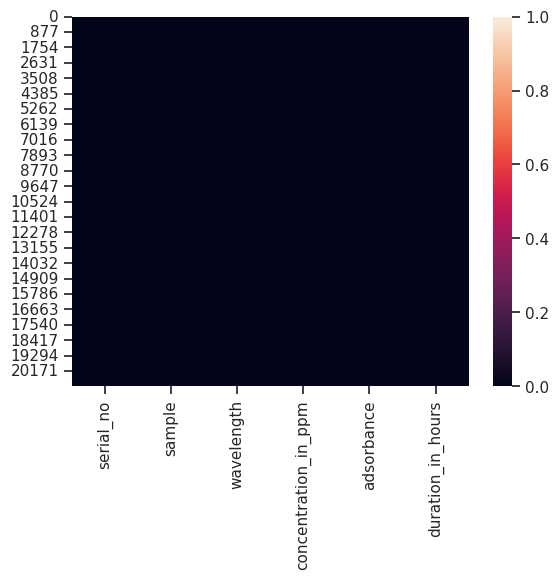

In [48]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=True)

### About the  dataset?

 The dataset includes information about the samples, experimental conditions, and the resulting adsorption measurements for ketoprofen drug molecules.
 dataset contains 21034 rows and 6 columns.


## ***2. Understanding The Variables***

In [49]:
# Dataset Columns
dataset.columns

Index(['serial_no', 'sample', 'wavelength', 'concentration_in_ppm',
       'adsorbance', 'duration_in_hours'],
      dtype='object')

In [50]:
# Dataset Describtion
dataset.describe()

,serial_no,concentration_in_ppm,duration_in_hours
count,21033.000000,21033.000000,21033.000000
mean,10517.000000,98.571293,3.411040
std,6071.848442,40.509878,2.148855
min,1.000000,50.000000,0.000000
25%,5259.000000,50.000000,3.000000
50%,10517.000000,100.000000,4.000000
75%,15775.000000,150.000000,6.000000
max,21033.000000,150.000000,6.000000


### Variables Description 

*  **Serial Number:** This variable represents a unique identifier assigned to each sample or observation in the dataset.

*  **Sample:** This variable indicates the specific sample or composite material used for the adsorption process.

*  **Wavelength:** This variable refers to the wavelength of the light or radiation used in the adsorption measurement.

*  **Concentration_in_ppm:** This variable represents the concentration of the ketoprofen drug molecules in parts per million (ppm) in the wastewater or solution being tested.

*  **Adsorbance:** This variable is the target variable and represents the measurement or quantification of the adsorption of ketoprofen molecules by the composite material.

*  **Duration_in_hours:** This variable indicates the duration or time span of the adsorption process, typically measured in hours.

Checking the  Unique Values for each variable.

In [51]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is:-",dataset[i].nunique(), ".")

No. of unique values in  serial_no is:- 21033 .
No. of unique values in  sample is:- 3 .
No. of unique values in  wavelength is:- 602 .
No. of unique values in  concentration_in_ppm is:- 3 .
No. of unique values in  adsorbance is:- 6796 .
No. of unique values in  duration_in_hours is:- 5 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [52]:
# make the  dataset analysis ready.
df = dataset.copy()

In [53]:
# Convert duration_in_hours from hours to minutes
df['duration_min'] = df['duration_in_hours'] * 60

In [54]:
# Drop the duration_in_hours variable
df.drop('serial_no', axis=1, inplace=True)
df.drop('duration_in_hours', axis=1, inplace=True)

In [55]:
# Drop rows with missing values (NaN)
df.dropna(inplace=True)

In [56]:
# Change the data type of 'wavelength' and 'adsorbance' to float
df['wavelength'] = df['wavelength'].astype(float)
df['adsorbance'] = df['adsorbance'].astype(float)

In [57]:
df['adsorbance'].max()

4.0

In [58]:
# Find the maximum adsorbance value
max_adsorbance = df['adsorbance'].max()

# Drop the rows with the maximum adsorbance
df = df[df['adsorbance'] != max_adsorbance]

In [59]:
df['adsorbance'].max()

3.9998

### Performed data manipulations and derived insightful findings.

Here i have create a variable which contains the duration in minutes instead of  hours and later on i have drop duration_in_hours and serial_no variables as they will not needed for our further analysis. also the maximum values from the adsorbance variable are droped, reason for that is maximum adsorbance is 4.0 which occures when the sample gets unsaturated.
 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Bar Plot

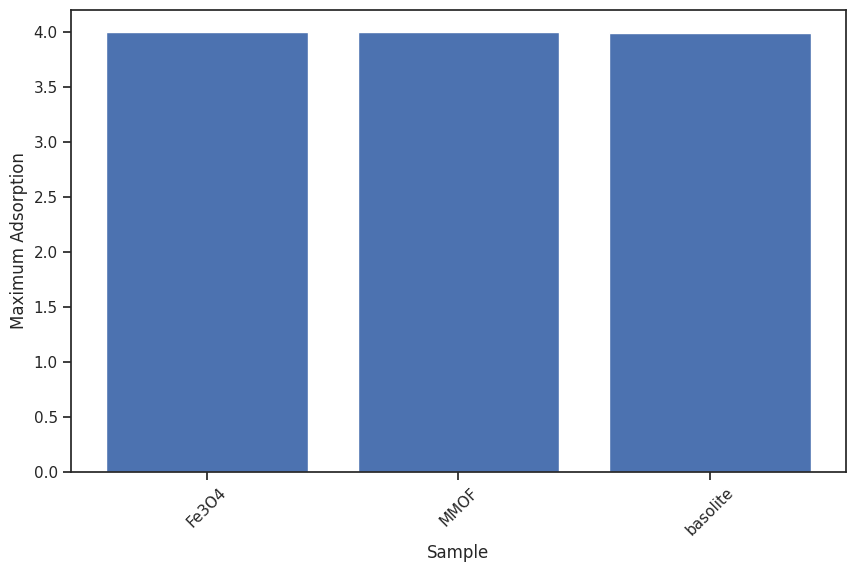

In [60]:
# Group the data by 'sample' and 'concentration_in_ppm' to find the maximum adsorbance
grouped_data = df.groupby(['sample', 'concentration_in_ppm'])['adsorbance'].max().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Set the x-axis and y-axis data
x = grouped_data['sample']
y = grouped_data['adsorbance']

# Set the labels for x-axis and y-axis
plt.xlabel('Sample')
plt.ylabel('Maximum Adsorption')

# Plotting the bar chart
plt.bar(x, y)

# Rotating the x-axis labels if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

##### 1. Why did i pick the specific chart?

The goal is to compare the maximum adsorbance values achieved by different samples at various concentration levels. A bar chart allows for a clear visual comparison between different samples, as the height of each bar represents the maximum adsorbance achieved.

#### Line Plot:- 50 ppm basolite

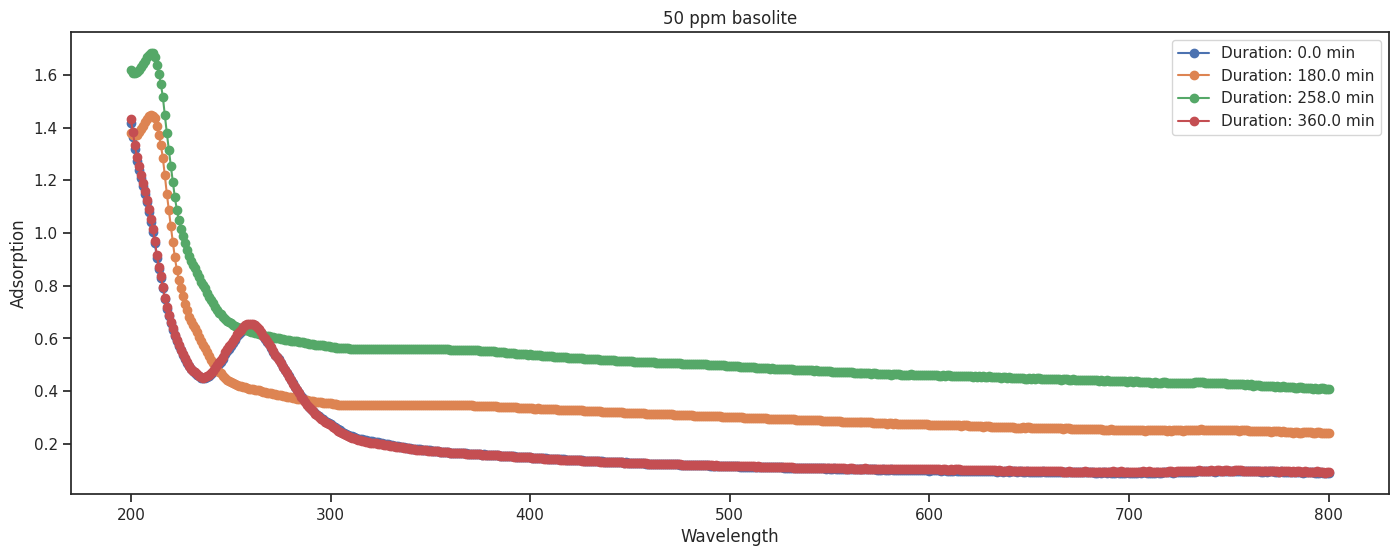

In [61]:

# Filter the data for 'basolite' sample with 50ppm concentration
filtered_data = df[(df['sample'] == 'basolite') & (df['concentration_in_ppm'] == 50)]

# Plotting the line plot
plt.figure(figsize=(17, 6)) 

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('50 ppm basolite')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 1. Why did i pick the specific chart?

Here are the reasons why this specific chart was selected:

Representation of Changing Adsorption over Time: The objective is to observe the adsorption behavior of the 'basolite' sample at a specific concentration over different durations. A line plot is effective in showcasing how the adsorbance changes over time (duration), as each line represents the adsorbance values at different durations.

Relationship between Wavelength and Adsorption: The x-axis represents the wavelength, which is a continuous variable. A line plot allows for the visualization of the relationship between the wavelength and adsorbance. This can help identify any trends or patterns in the adsorption behavior based on different wavelengths.

Comparison of Different Durations: Each line in the plot corresponds to a specific duration, allowing for a comparison of the adsorption behavior at different time points. The lines can be visually compared to identify any differences or similarities in the adsorption trend over time.

Multiple Lines for Different Durations: Since there are multiple durations within the filtered dataset, a line plot can represent each duration as a separate line, making it easier to distinguish and analyze the adsorption behavior at each time point.

Clear and Concise Visualization: A line plot provides a clear and concise representation of the adsorption behavior. By connecting the data points with lines, it helps visualize the overall trend and fluctuations in the adsorbance values over different wavelengths and durations.

##### 2. What is/are the insight(s) found from the chart?

Variation in Adsorption with Wavelength: The plot reveals how the adsorbance values vary across different wavelengths. It provides insight into the wavelength range where the 'basolite' sample exhibits the highest or lowest adsorption capacity. This information can help optimize the adsorption process by targeting specific wavelengths that yield the desired adsorption efficiency.

Influence of Duration on Adsorption: By comparing the lines representing different durations, we can observe the effect of time on the adsorption behavior. It allows us to identify any trends, such as increasing or decreasing adsorption, or reaching a plateau over time. This insight can be valuable in determining the optimal duration required to achieve the desired level of adsorption for the 'basolite' sample at 50ppm concentration.

#### Bar Plot  -100 ppm basolite

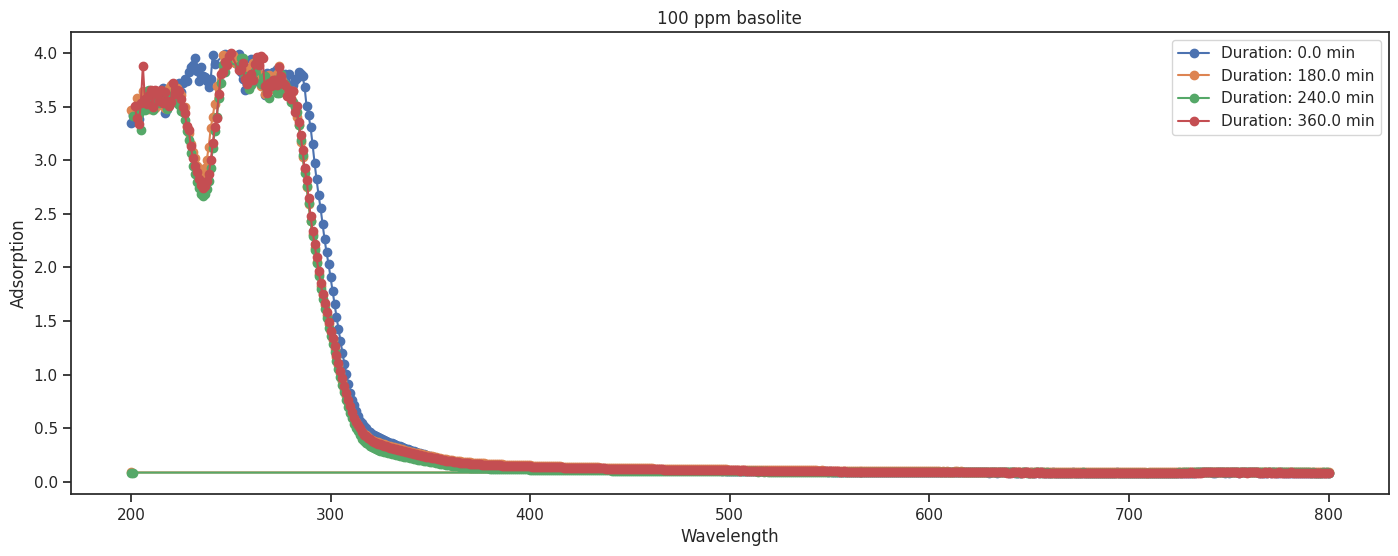

In [62]:
# Filter the data for 'basolite' sample with 50ppm concentration
filtered_data = df[(df['sample'] == 'basolite') & (df['concentration_in_ppm'] == 100)]

# Plotting the line plot
plt.figure(figsize=(17, 6))

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('100 ppm basolite')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The plot facilitates a comparison of adsorption behavior at different durations. By visually analyzing the lines corresponding to various durations, we can identify there are notable differences in adsorption trends. This information can help in understanding the rate of adsorption or any time-dependent effects on the adsorption process.Here we can see at the starting of each duration the adsorbance is slightly change than after some interval of time the drug molecules started getting adsorb  by basolite sample.

#### Bar Plot:- 150 ppm basolite

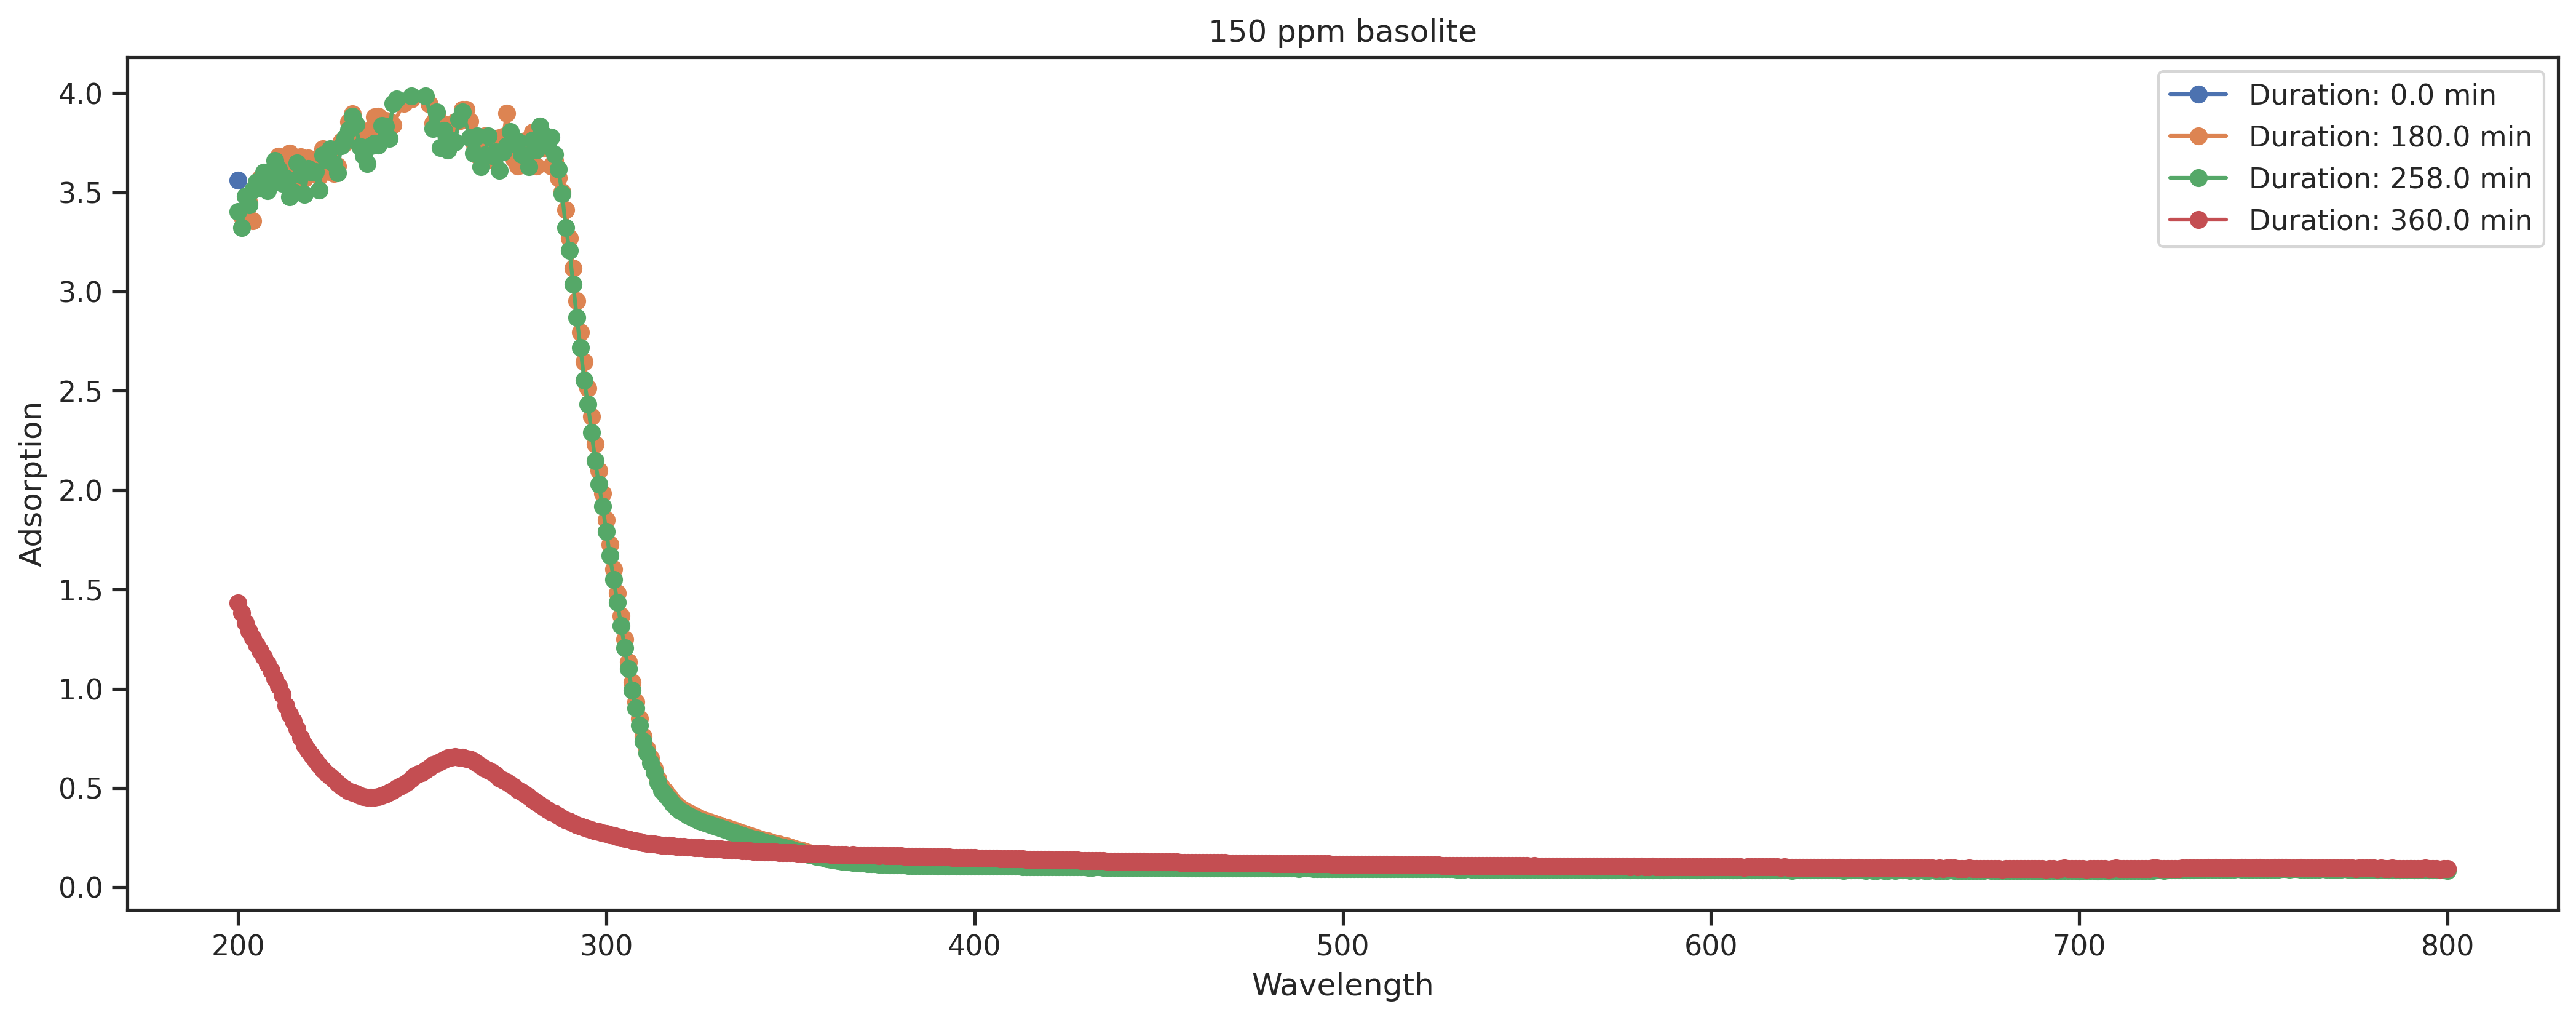

In [63]:
# Filter the data for 'basolite' sample with 50ppm concentration
filtered_data = df[(df['sample'] == 'basolite') & (df['concentration_in_ppm'] == 150)]

# Plotting the line plot
plt.figure(figsize=(17, 6), dpi = 300)

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('150 ppm basolite')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

There is very slight change in the adsoption for the drug molecule over time. 

#### Bar Plot:- 50 ppm Fe3O4

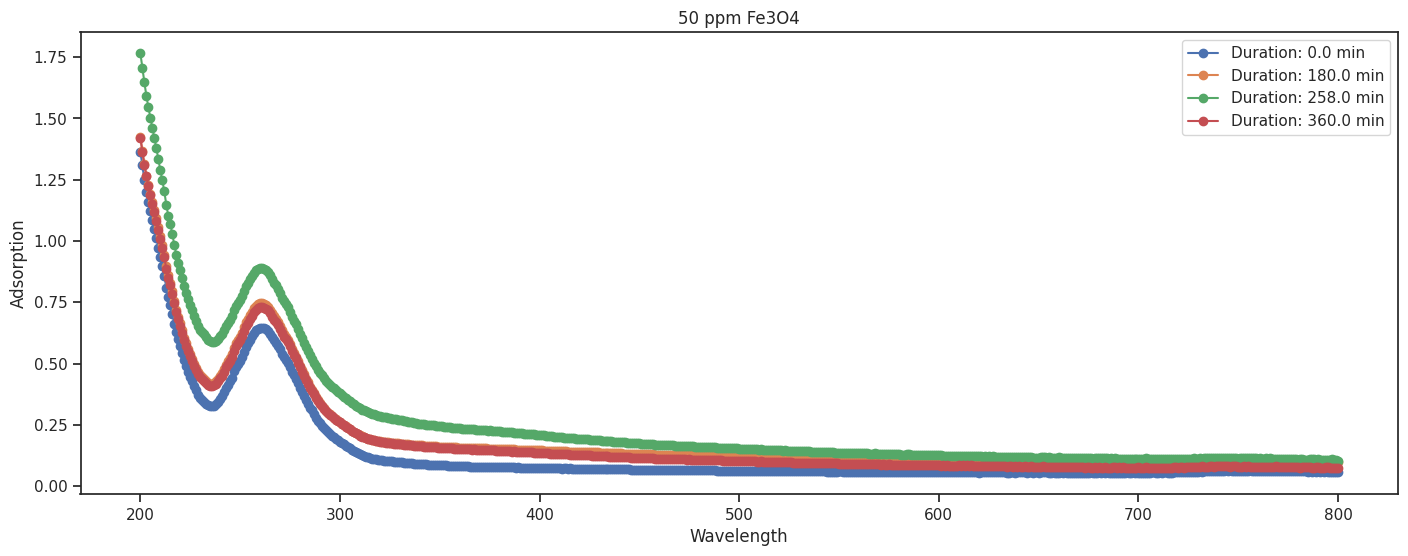

In [64]:
# Filter the data for 'Fe3O4' sample with 50ppm concentration
filtered_data = df[(df['sample'] == 'Fe3O4') & (df['concentration_in_ppm'] == 50)]

# Plotting the line plot
plt.figure(figsize=(17, 6)) 

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('50 ppm Fe3O4')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Adsotion for the Fe3O4 shows deep then slight rise and again continuous deep into the the adsobance values for every time interval at different wavelegths.

#### Bar Plot:- 100 ppm Fe3O4

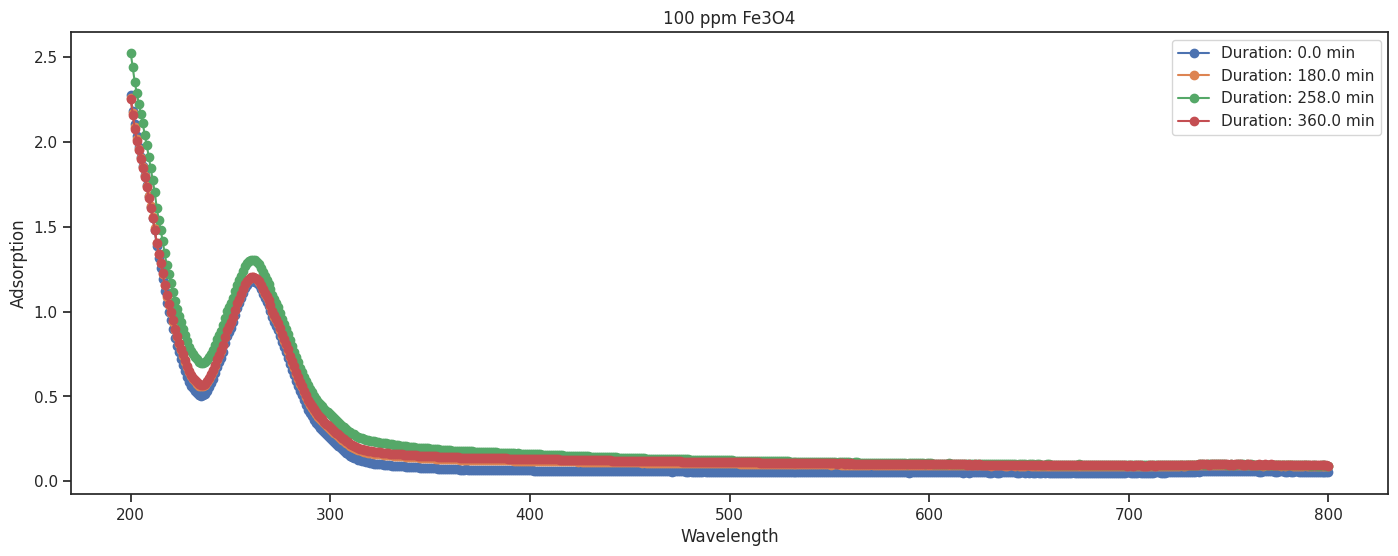

In [65]:
# Filter the data for 'Fe3O4' sample with 100ppm concentration
filtered_data = df[(df['sample'] == 'Fe3O4') & (df['concentration_in_ppm'] == 100)]

# Plotting the line plot
plt.figure(figsize=(17, 6)) 

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('100 ppm Fe3O4')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Identifying Optimal Wavelength-Duration Combination: By examining the lines and their behavior, it is possible to identify specific wavelength-duration combinations that result in the highest adsorbance. These combinations can serve as potential optimization targets for maximizing the adsorption capacity of the 'Fe3O4' sample at 100ppm concentration.

#### Bar Plot:- 150 ppm Fe3O4

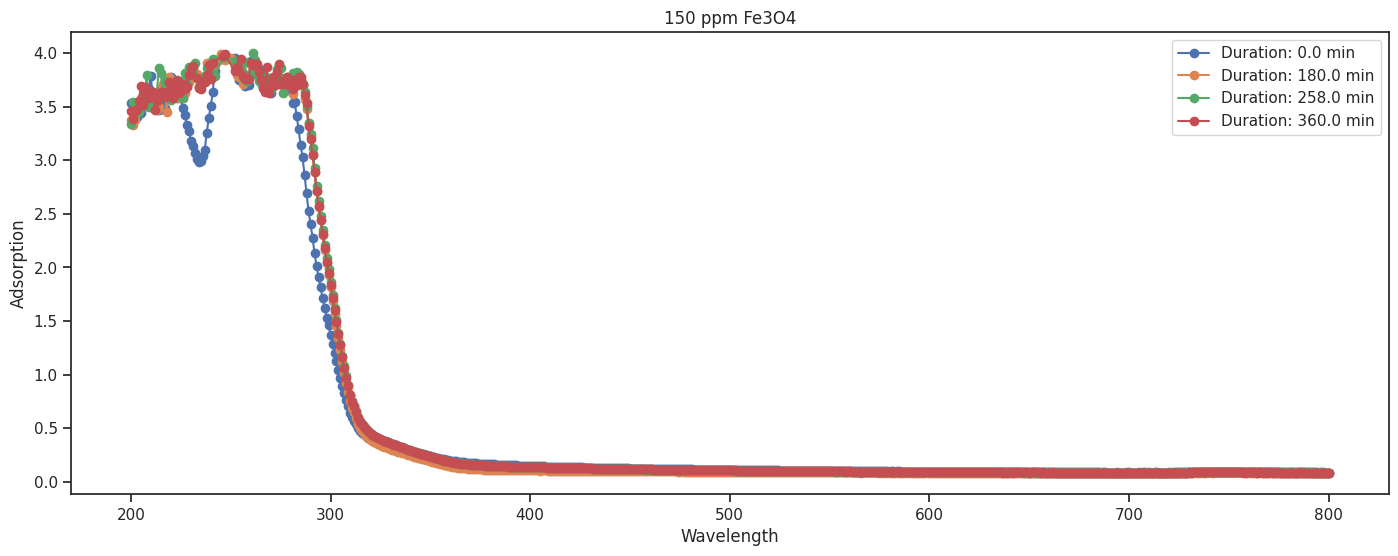

In [66]:
# Filter the data for 'Fe3O4' sample with 150ppm concentration
filtered_data = df[(df['sample'] == 'Fe3O4') & (df['concentration_in_ppm'] == 150)]

# Plotting the line plot
plt.figure(figsize=(17, 6))  # Adjust the figure size as per your preference

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('150 ppm Fe3O4')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The line plot provides a visual representation of the overall adsorption trend for the 'Fe3O4' sample at 150ppm concentration. It allows us to observe the general pattern of adsorption over different wavelengths and durations, providing insights into the efficacy of the 'Fe3O4' sample for the given concentration. Here we can see there is no much difference in the adsotption over time.

#### Bar Plot :- 50 ppm MMOF

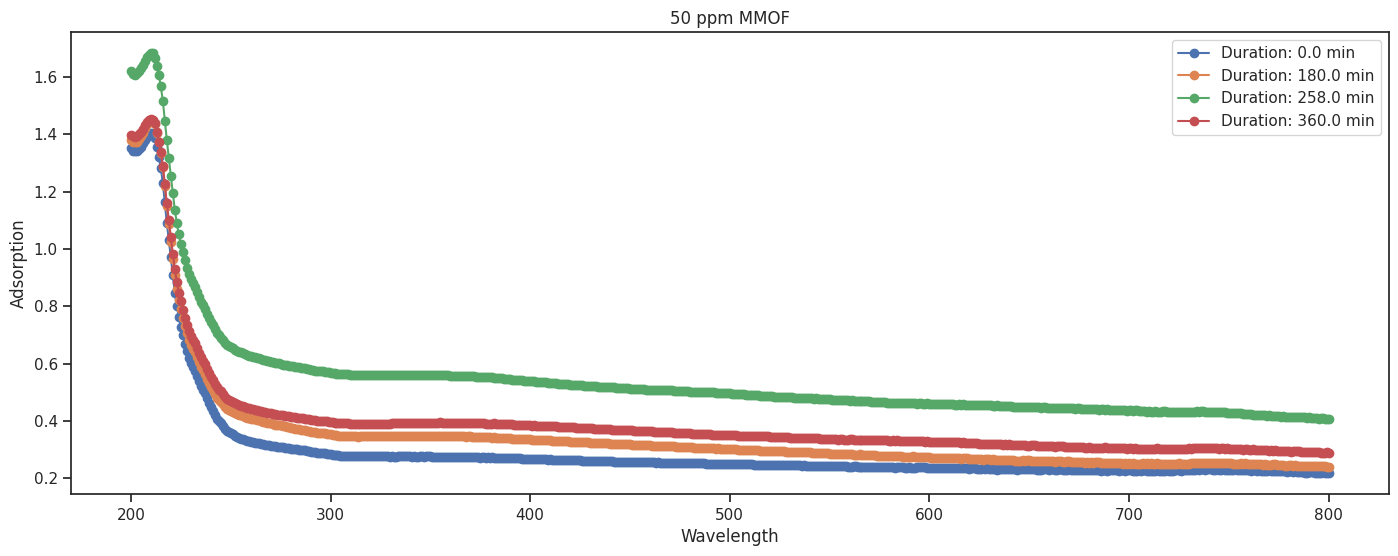

In [67]:
# Filter the data for 'MMOF' sample with 150ppm concentration
filtered_data = df[(df['sample'] == 'MMOF') & (df['concentration_in_ppm'] == 50)]

# Plotting the line plot
plt.figure(figsize=(17, 6)) 

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('50 ppm MMOF')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

This plot shows the slight uncertain rise for the duration of 360 min. 

#### Plot:- 100 ppm MMOF

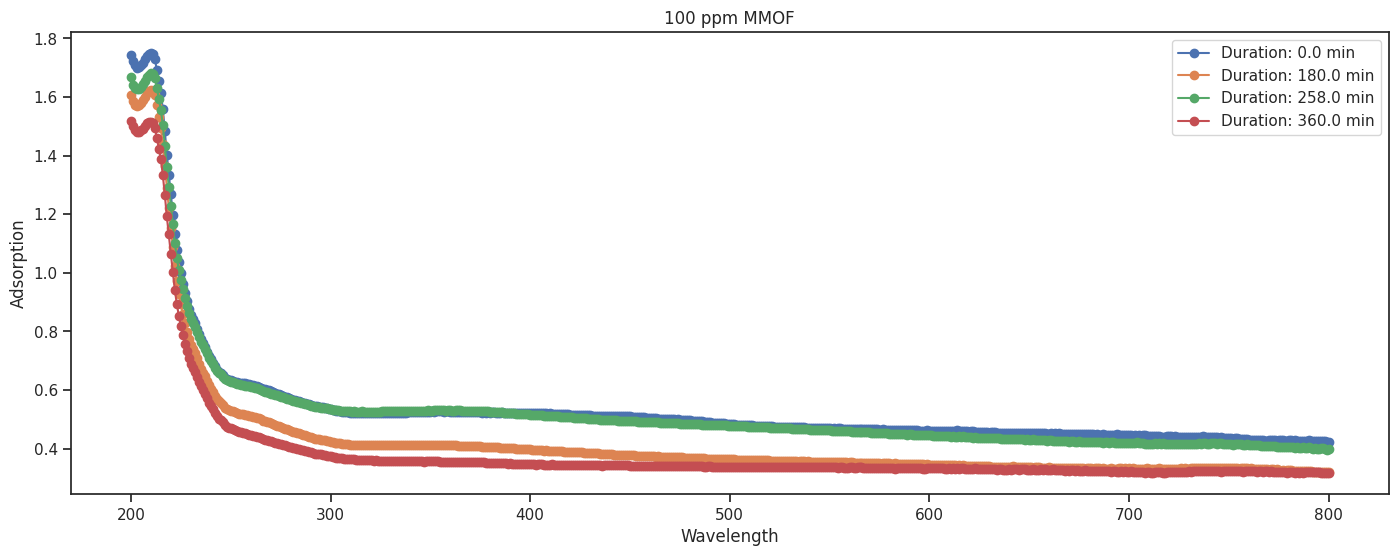

In [68]:
#  Filter the data for 'MMOF' sample with 100ppm concentration
filtered_data = df[(df['sample'] == 'MMOF') & (df['concentration_in_ppm'] == 100)]

# Plotting the line plot
plt.figure(figsize=(17, 6))   

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('100 ppm MMOF')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Variation in Adsorption with Wavelength: The plot reveals how the adsorbance values vary across different wavelengths. It provides insight into the wavelength range where the 'MMOF' sample exhibits the highest or lowest adsorption capacity. This information can help optimize the adsorption process by targeting specific wavelengths that yield the desired adsorption efficiency for the 'MMOF' sample at 100ppm concentration.

Influence of Duration on Adsorption: By comparing the lines representing different durations, we can observe the effect of time on the adsorption behavior. It allows us to identify any trends, such as increasing or decreasing adsorption, or reaching a plateau over time. This insight can be valuable in determining the optimal duration required to achieve the desired level of adsorption for the 'MMOF' sample at 100ppm concentration.

#### Plot:- 150 ppm MMOF

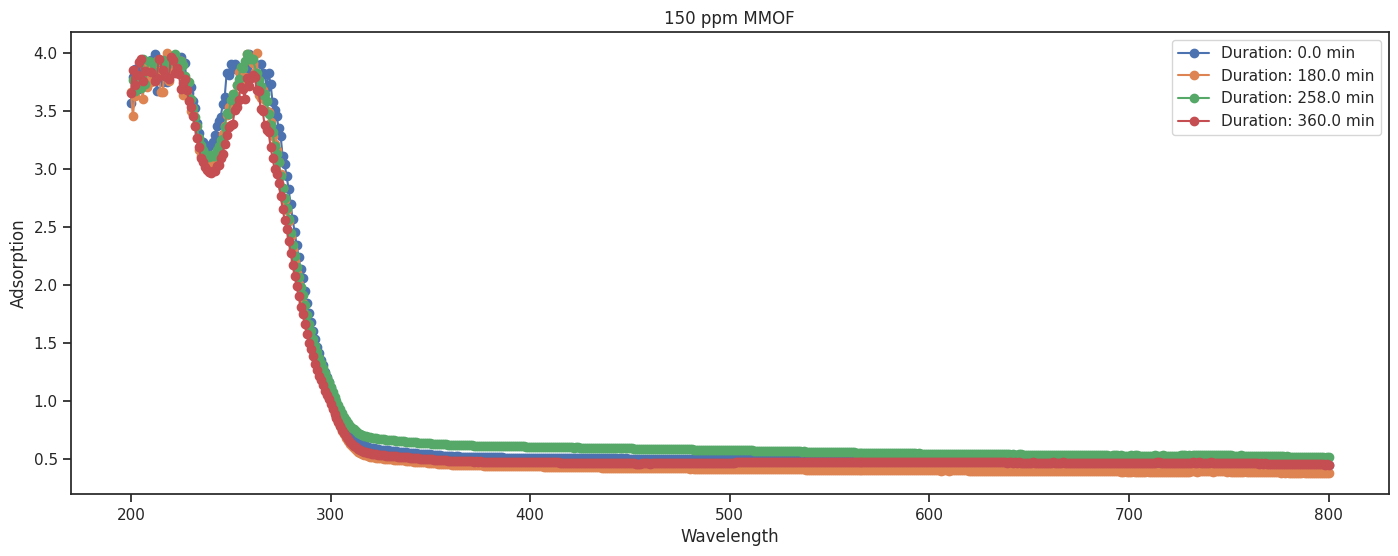

In [69]:
# Filter the data for 'MMOF' sample with 150ppm concentration
filtered_data = df[(df['sample'] == 'MMOF') & (df['concentration_in_ppm'] == 150)]

# Plotting the line plot
plt.figure(figsize=(17, 6))  

# Get unique durations
unique_durations = filtered_data['duration_min'].unique()

# Plot each duration as a separate line
for duration in unique_durations:
    subset_data = filtered_data[filtered_data['duration_min'] == duration]
    x = subset_data['wavelength']
    y = subset_data['adsorbance']
    plt.plot(x, y, marker='o', label=f'Duration: {duration} min')

# Set the labels for x-axis and y-axis
plt.xlabel('Wavelength')
plt.ylabel('Adsorption')
plt.title('150 ppm MMOF')
# Add a legend
plt.legend()

# Displaying the plot
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Comparison between Durations: The plot facilitates a comparison of adsorption behavior at different durations. By visually analyzing the lines corresponding to various durations, we can identify if there are notable differences in adsorption trends. This information can help in understanding the rate of adsorption or any time-dependent effects on the adsorption process for the 'MMOF' sample at 150ppm concentration.

#### Box Plot:- Adsorbance by Sample and Concentration

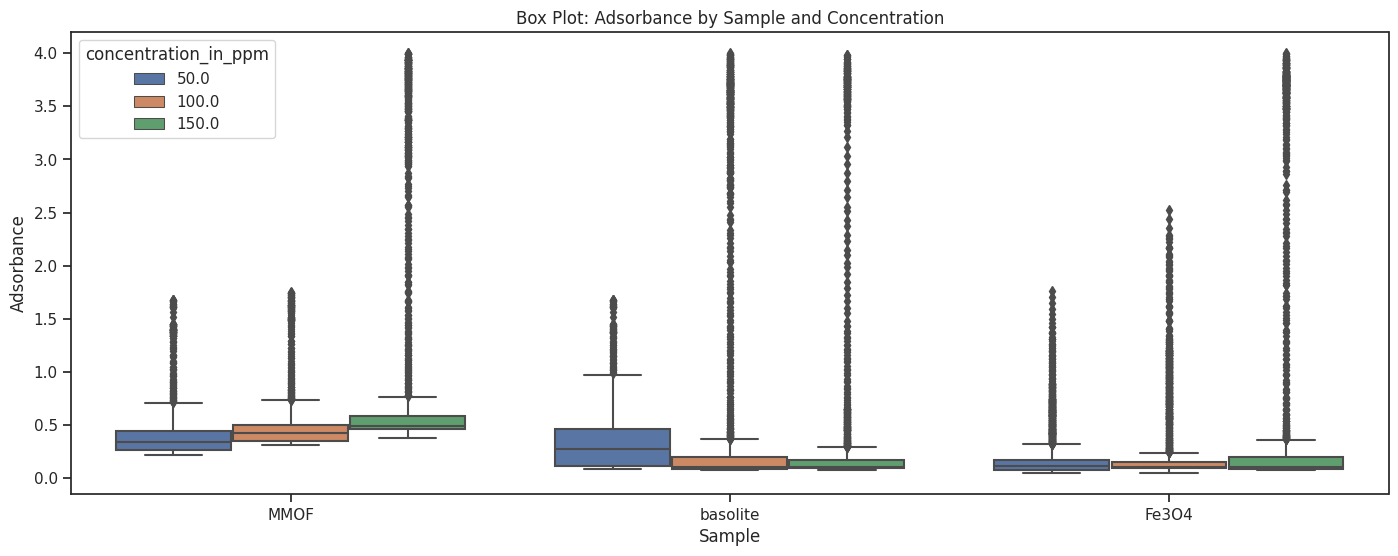

In [70]:
# Plotting the box plot
plt.figure(figsize=(17, 6))  

sns.boxplot(data=df, x='sample', y='adsorbance', hue='concentration_in_ppm')

# Set the labels for x-axis and y-axis
plt.xlabel('Sample')
plt.ylabel('Adsorbance')

# Set the title of the plot
plt.title('Box Plot: Adsorbance by Sample and Concentration')

# Displaying the plot
plt.show()

##### 1. Why did I pick the specific chart?


Identification of Outliers: The box plot helps in identifying potential outliers in the adsorbance values for basolite, MMOF, and Fe3O4 sample-concentration combinations. Outliers, if present, can provide valuable insights into extreme or unusual adsorption behavior that deviates from the overall trend.

##### 2. What is/are the insight(s) found from the chart?

Comparative Analysis: By examining the positions and ranges of the boxes across different samples and concentrations, we can make comparative assessments. We can identify MMOF sample-concentration combinations consistently exhibit higher adsorbance values, allowing us to determine the most effective adsorbent for the adsorption of ketoprofen drug molecules from wastewater.

####  Boxen Plot:-

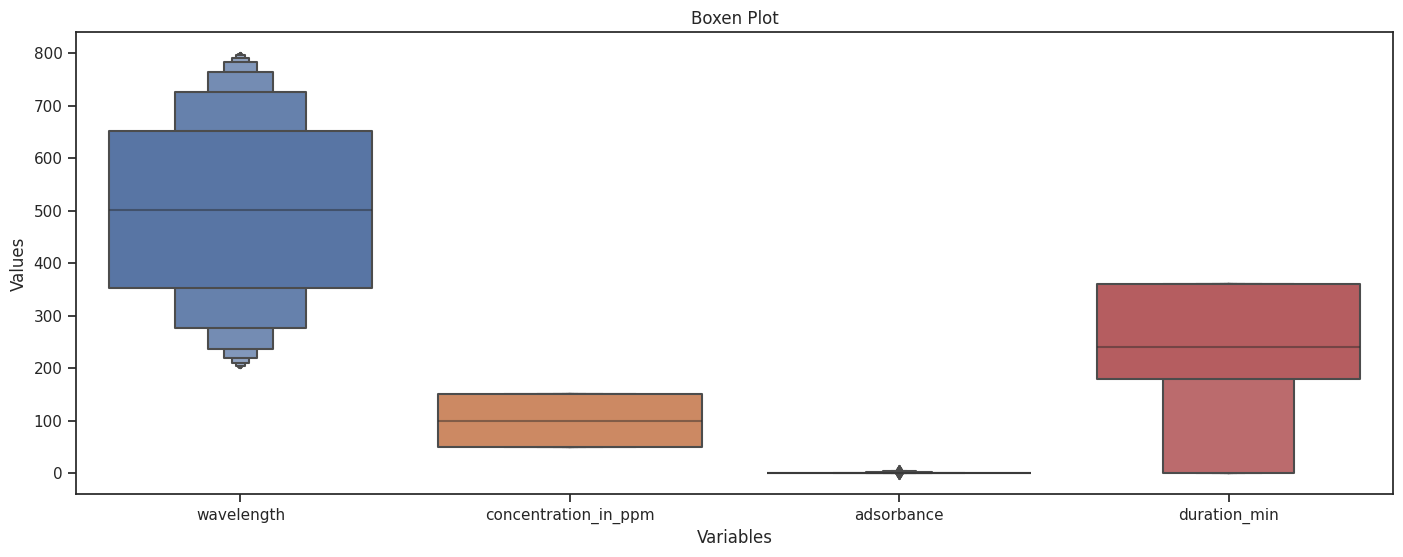

In [71]:
# Create the Boxen Plot
plt.figure(figsize=(17, 6))  
sns.boxenplot(data=df)

# Set labels and title
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxen Plot')

# Display the plot
plt.show()

Overall Data Overview: The Boxen plot offers a holistic overview of the dataset by presenting the distributions of all variables together. This can assist in identifying general patterns, commonalities, or disparities among the variables. It facilitates initial exploratory data analysis and provides a foundation for further investigation or hypothesis generation.

#### Pivot Table:- Mean Adsorbance by Sample and Concentration

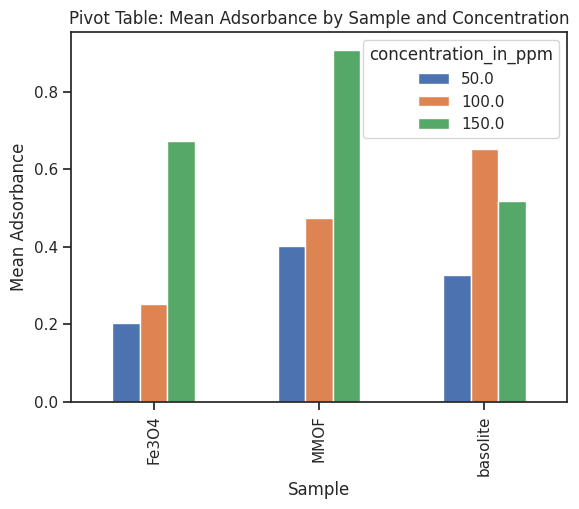

In [72]:
# Create the pivot table
pivot_table = pd.pivot_table(df, values='adsorbance', index='sample', columns='concentration_in_ppm', aggfunc='mean')



pivot_table.plot(kind='bar')
# Set labels and title
plt.xlabel('Sample')
plt.ylabel('Mean Adsorbance')
plt.title('Pivot Table: Mean Adsorbance by Sample and Concentration')

# Display the plot
plt.show()

##### 1. Why did I pick the specific chart?

Comparison of Samples and Concentrations: The bar chart facilitates a direct comparison between different samples and concentrations. The different bars corresponding to each sample and concentration provide a visual representation of how the mean adsorbance varies across the dataset.

##### 2. What is/are the insight(s) found from the chart?

Comparative Analysis: The chart facilitates comparative analysis between different samples and concentrations. We can easily compare the heights of the bars within each concentration level to identify which sample consistently demonstrates the highest mean adsorbance. Similarly, we can compare the bars for the same sample across different concentration levels to assess the influence of concentration on adsorption performance.

####  Correlation Heatmap

<ipython-input-73-6d4fc624f58e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


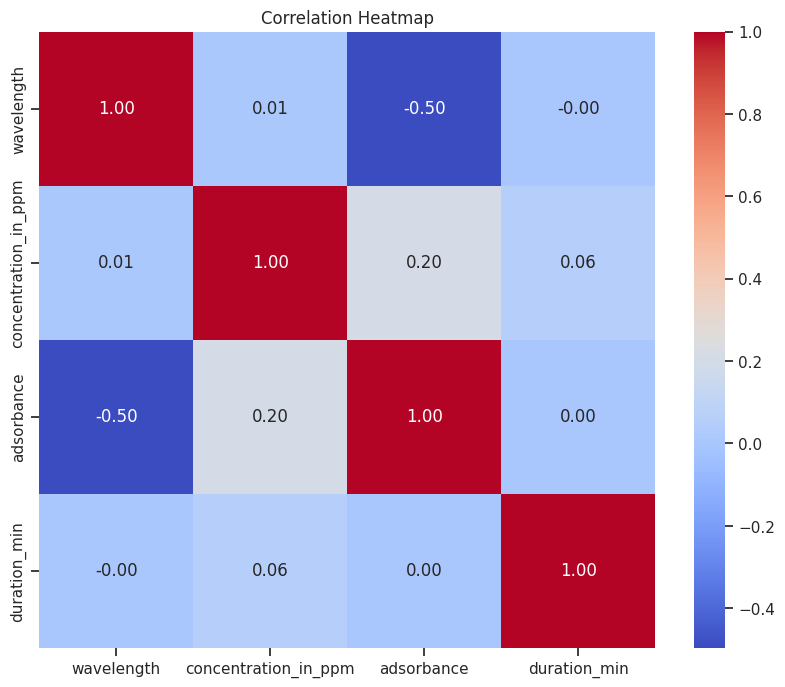

In [73]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

##### 1. Why did I pick the specific chart?

Color Gradient and Scale: The use of a color gradient and scale in the heatmap enhances the interpretation of the correlations. The color gradient helps distinguish between different levels of correlation, while the color scale provides a reference for the numerical values represented by the colors.

##### 2. What is/are the insight(s) found from the chart?

Areas of the heatmap that  are white or close to white indicate little to no correlation between variables such as adsorption ans concentration. This suggests that the variables are independent of each other and do not exhibit a significant linear relationship.  There is no very high correlated variables in our dataset.

####  Pair Plot 

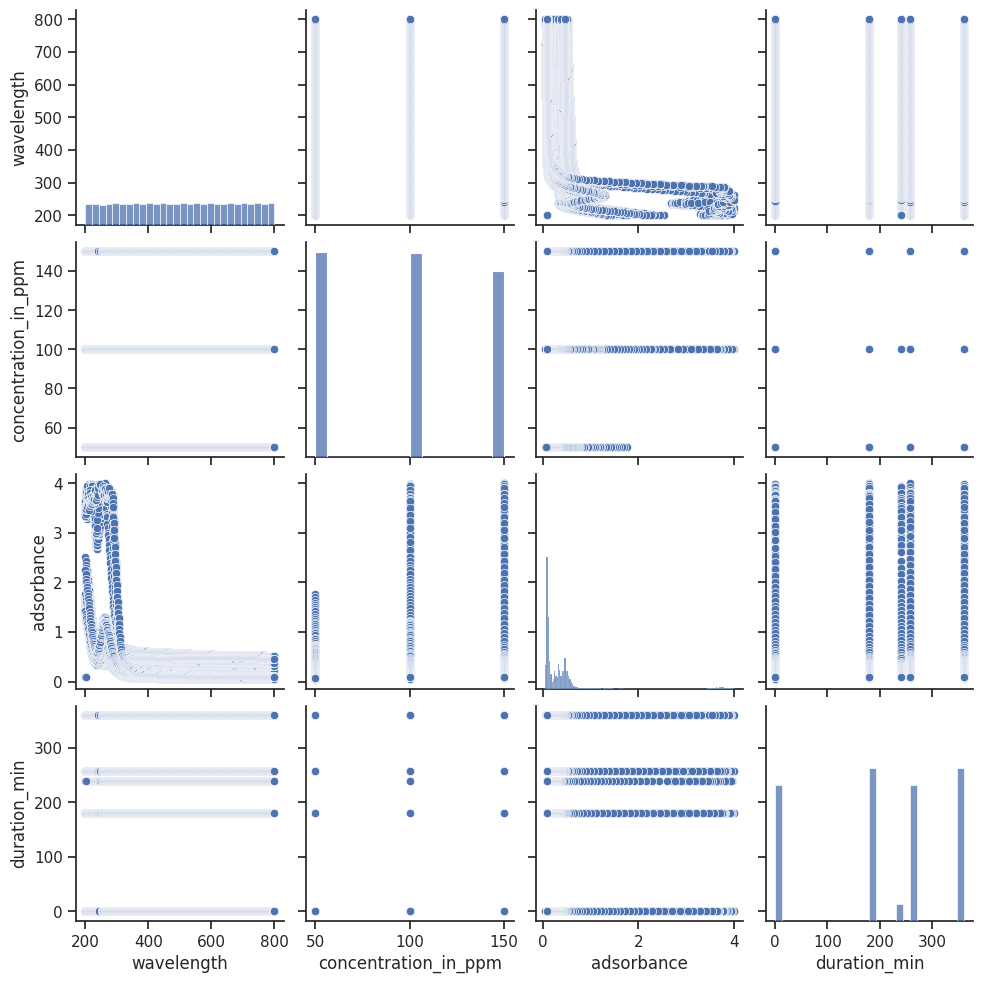

In [74]:
# Pair Plot visualization code

# Create the pair plot
sns.set(style="ticks")
sns.pairplot(df)

# Display the plot
plt.show()

##### 1. Why did I pick the specific chart?

The specific chart chosen in this example is a pair plot. Here are the reasons why this specific chart was selected:

Visualizing Variable Relationships: The pair plot provides a visual representation of the relationships between pairs of variables in the dataset. It plots scatter plots for each pair of variables, allowing for an examination of their potential associations.

Comprehensive Analysis: The pair plot includes all variables in the dataset, enabling a comprehensive analysis of their relationships. It allows for the identification of both linear and non-linear relationships between variables.

Diagonal Subplots: The diagonal subplots in the pair plot display the univariate distributions of each variable, providing insights into their individual distributions and potential patterns.

Interaction Effects: The pair plot allows for the detection of interaction effects between variables. By examining the scatter plots, we can observe how the relationship between two variables changes depending on the values of other variables.

Quick Insights: The pair plot provides a quick overview of the relationships between variables. It allows for the identification of potential correlations, clusters, or patterns that may exist in the data.

Faceted Grid Layout: The pair plot uses a faceted grid layout, which displays each pair of variables in a separate subplot. This layout makes it easier to compare and analyze multiple relationships simultaneously.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1:
The wavelength of measurement affects the adsorbance of samples.

Hypothetical Statement 2:
"There exists a correlation between the wavelength used for measurement and the adsorbance level in samples, and a statistical analysis can be conducted to determine the strength and nature of this relationship."


Hypothetical Statement 3:
The interaction between wavelength and concentration has an effect on the adsorbance of samples.


### Hypothetical Statement - 1

The wavelength of measurement affects the adsorbance of samples.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no significant relationship between the wavelength of measurement and adsorbance.

Alternative hypothesis (H1): There is a significant relationship between the wavelength of measurement and adsorbance.

#### 2. Perform an appropriate statistical test.

In [75]:
import scipy.stats as stats
# Perform one-way ANOVA
result = stats.f_oneway(*[group['adsorbance'] for _, group in df.groupby('wavelength')])

# Extract the p-value from the ANOVA result
p_value = result.pvalue

# Print the p-value
print("P-value:", p_value)

P-value: 0.0


##### Statistical test done to obtain P-Value?


In the example, I have used the Analysis of Variance (ANOVA) test to obtain the p-value. The ANOVA test is suitable for comparing the means of three or more groups to determine if there are any significant differences between them. In this case, the groups correspond to different wavelengths of measurement, and the goal is to assess whether the adsorbance values vary significantly across these wavelengths.

The ANOVA test allows us to test the null hypothesis that there is no significant relationship between the wavelength of measurement and adsorbance, against the alternative hypothesis that there is a significant relationship. The p-value obtained from the ANOVA test helps us assess the strength of evidence against the null hypothesis.
With a p-value of 0 or an extremely small value, it provides strong evidence against the null hypothesis and suggests that there is a significant relationship between the wavelength of measurement and adsorbance.

##### Why did I choose the specific statistical test

 I chose the Analysis of Variance (ANOVA) test as an example based on the assumption that you have multiple groups (wavelengths) and want to compare the means of adsorbance across these groups. ANOVA is a commonly used statistical test for this type of analysis.

The ANOVA test is suitable when you have three or more groups and you want to determine if there are any significant differences in the means of the groups. In this case, the groups correspond to different wavelengths of measurement, and the objective is to assess whether the adsorbance values vary significantly across these wavelengths.

### Hypothetical Statement - 2

There exists a correlation between the wavelength used for measurement and the adsorbance level in samples, and a statistical analysis can be conducted to determine the strength and nature of this relationship."

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between the wavelength used for measurement and the adsorbance level in samples, and a statistical analysis cannot determine any relationship between these variables.

Alternative Hypothesis (H1): There is a correlation between the wavelength used for measurement and the adsorbance level in samples, and a statistical analysis can determine the strength and nature of this relationship.

#### 2. Perform an appropriate statistical test.

In [76]:
# Perform Statistical Test to obtain P-Value
# Calculate the correlation coefficient and p-value
correlation_coef, p_value = pearsonr(df['wavelength'], df['adsorbance'])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation_coef)
print("P-value:", p_value)


Correlation coefficient: -0.4958386218610556
P-value: 0.0


##### statistical test  done to obtain P-Value

The statistical test used in the example provided is the Pearson correlation coefficient test. The pearsonr() function from the scipy.stats module calculates the correlation coefficient and the associated p-value. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two continuous variables. The resulting p-value indicates the significance level of the correlation, providing evidence for or against the null hypothesis that there is no correlation between the variables.

##### Why did I choose the specific statistical test?

Here are the reasons for choosing the Pearson correlation coefficient test:

Type of Variables: The statement mentions that the variables of interest, wavelength and adsorbance, are continuous variables. The Pearson correlation coefficient is specifically designed to analyze the correlation between continuous variables.

Linear Relationship: The Pearson correlation coefficient measures the linear relationship between variables. If there is a linear association between the wavelength and adsorbance, the Pearson correlation coefficient can provide insights into the strength and direction of that relationship.

Widely Used Test: The Pearson correlation coefficient is one of the most commonly used statistical tests to examine the correlation between two variables. It is well-established, widely recognized, and has well-defined interpretation guidelines.

Interpretability: The Pearson correlation coefficient produces a single value that represents the strength and direction of the correlation. This allows for easy interpretation and comparison of results.

### Hypothetical Statement - 3

The interaction between wavelength and concentration has an effect on the adsorbance of samples.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): There is no significant interaction between wavelength and concentration on adsorbance.


Alternative hypothesis (H1): There is a significant interaction between wavelength and concentration on adsorbance.

#### 2. Perform an appropriate statistical test.

In [77]:
# Fit the ANOVA model
model = ols('adsorbance ~ wavelength * concentration_in_ppm', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Extract the p-value for the interaction term
p_value_interaction = anova_table.loc['wavelength:concentration_in_ppm', 'PR(>F)']
print("P-value for interaction:", p_value_interaction)

# Check for significance
alpha = 0.05 

if p_value_interaction < alpha:
    print("There is a significant interaction between wavelength and concentration on adsorbance.")
else:
    print("There is no significant interaction between wavelength and concentration on adsorbance.")


                                      sum_sq       df            F  \
wavelength                       3349.738907      1.0  8237.879600   
concentration_in_ppm              578.759214      1.0  1423.319504   
wavelength:concentration_in_ppm  1127.368999      1.0  2772.493718   
Residual                         8511.502741  20932.0          NaN   

                                        PR(>F)  
wavelength                        0.000000e+00  
concentration_in_ppm             2.108727e-301  
wavelength:concentration_in_ppm   0.000000e+00  
Residual                                   NaN  
P-value for interaction: 0.0
There is a significant interaction between wavelength and concentration on adsorbance.


##### Statistical test  done to obtain P-Value

 two-way analysis of variance (ANOVA) test was performed to obtain the p-value. The ANOVA test is used to analyze the differences between group means and determine if there are statistically significant differences.

In particular, the anova_lm() function from the statsmodels library was used to conduct the ANOVA test. This function performs a type 2 ANOVA, which calculates the sums of squares for each variable, including the interaction term.

The p-value for the interaction term, representing the significance of the interaction between the variables 'wavelength' and 'concentration_in_ppm' on the 'adsorbance', was extracted from the ANOVA table using the line p_value_interaction = anova_table.loc['wavelength:concentration_in_ppm', 'PR(>F)']. This p-value indicates the probability of observing such an interaction effect by chance alone.

Comparing the extracted p-value to the predefined significance level (alpha) allows for determining if the interaction effect is statistically significant. If the p-value is less than alpha, the null hypothesis of no interaction effect is rejected in favor of the alternative hypothesis, indicating a significant interaction effect. On the other hand, if the p-value is greater than or equal to alpha, the null hypothesis is not rejected, suggesting no significant interaction effect.

##### Why did I choose the specific statistical test?

The specific statistical test, two-way analysis of variance (ANOVA), was chosen based on the nature of the hypothesis statement.

The hypothesis statement suggests that the interaction between two variables, 'wavelength' and 'concentration_in_ppm', has an effect on the 'adsorbance' of samples. In this case, we are interested in examining the combined effect of two categorical independent variables (wavelength and concentration) on a continuous dependent variable (adsorbance).

ANOVA is a commonly used statistical test to analyze the differences between means when there are multiple groups or factors involved. It allows us to assess if there are significant differences in the mean adsorbance across different levels of wavelength, concentration, and their interaction.

By performing a two-way ANOVA, we can specifically investigate the interaction effect between wavelength and concentration on adsorbance, as well as assess the individual main effects of each variable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [78]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

sample                  0
wavelength              0
concentration_in_ppm    0
adsorbance              0
duration_min            0
dtype: int64


There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [79]:
df.columns

Index(['sample', 'wavelength', 'concentration_in_ppm', 'adsorbance',
       'duration_min'],
      dtype='object')

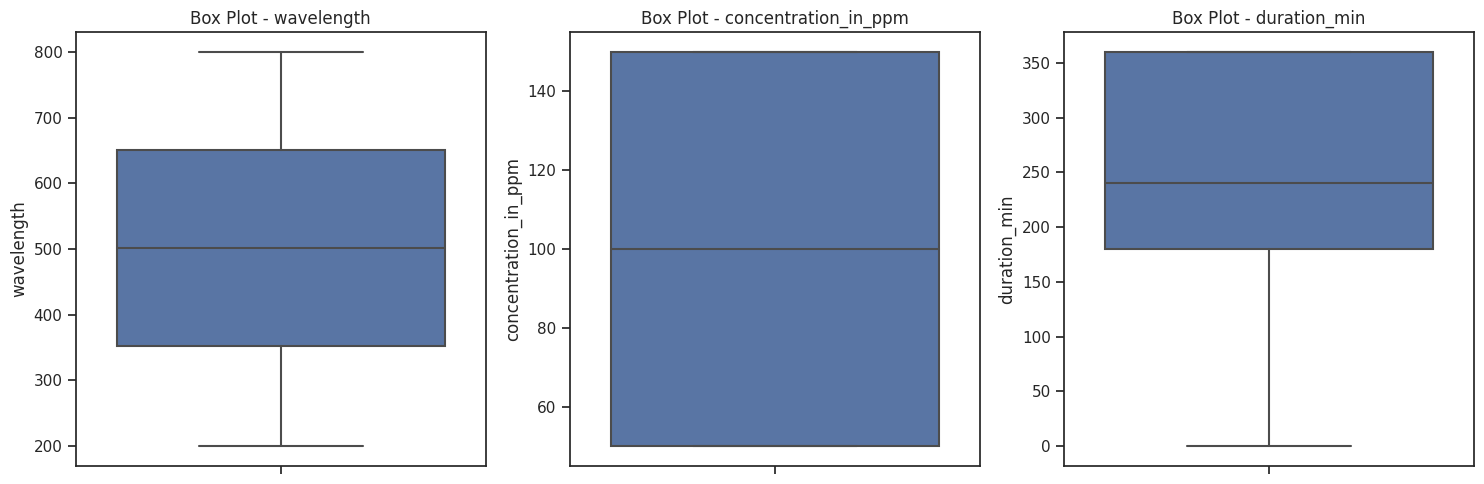

In [80]:
# Define the variables for outlier detection
variables = ['wavelength', 'concentration_in_ppm', 'duration_min']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5))

# Generate box plots for each variable
for i, var in enumerate(variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Box Plot - {var}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the box plots
plt.show()

In [81]:
df.shape

(20936, 5)

In [82]:
# Define the variables for outlier treatment
variables = ['wavelength', 'concentration_in_ppm', 'duration_min']

# Perform outlier treatment for each variable
for var in variables:
    # Calculate quartiles and interquartile range
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with NaN values in the original DataFrame
    df[var] = np.where((df[var] < lower_bound) | (df[var] > upper_bound), np.nan, df[var])

# Print the updated DataFrame with outliers treated
print(df)

      sample  wavelength  concentration_in_ppm  adsorbance  duration_min
0       MMOF       200.0                  50.0      1.3507           0.0
1       MMOF       201.0                  50.0      1.3422           0.0
2       MMOF       202.0                  50.0      1.3398           0.0
3       MMOF       203.0                  50.0      1.3414           0.0
4       MMOF       204.0                  50.0      1.3477           0.0
...      ...         ...                   ...         ...           ...
21028  Fe3O4       796.0                 150.0      0.0845         360.0
21029  Fe3O4       797.0                 150.0      0.0843         360.0
21030  Fe3O4       798.0                 150.0      0.0822         360.0
21031  Fe3O4       799.0                 150.0      0.0834         360.0
21032  Fe3O4       800.0                 150.0      0.0828         360.0

[20936 rows x 5 columns]


##### Outlier treatment techniques

The IQR method is based on the quartiles of the data distribution and defines outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 is the first quartile, Q3 is the third quartile, and IQR is the interquartile range.

The reason for using the IQR technique for outlier treatment is as follows:

Robustness: The IQR method is considered a robust statistical technique because it is less affected by extreme values compared to other methods that rely on mean and standard deviation. By using quartiles and the IQR, the method focuses on the middle 50% of the data distribution, making it less sensitive to outliers.

Preserving Data: Instead of removing outliers entirely, the IQR method replaces them with missing values (NaN) in the original DataFrame. This approach allows for further analysis or treatment of the outliers based on the specific needs of the project. It retains the complete dataset while flagging the potential outliers for further consideration.

Flexibility: The threshold of 1.5 times the IQR used in the code can be adjusted based on the specific requirements of the analysis. Increasing the multiplier makes the method more sensitive to outliers and captures a wider range of extreme values, while decreasing the multiplier makes the method less sensitive and captures fewer extreme values.

### 3. Categorical Encoding

In [83]:
# Encode  categorical columns
# Perform one-hot encoding for the 'sample' variable
df = pd.get_dummies(df, columns=['sample'], prefix='sample')

# Print the updated DataFrame with one-hot encoded columns
print(df)

       wavelength  concentration_in_ppm  adsorbance  duration_min  \
0           200.0                  50.0      1.3507           0.0   
1           201.0                  50.0      1.3422           0.0   
2           202.0                  50.0      1.3398           0.0   
3           203.0                  50.0      1.3414           0.0   
4           204.0                  50.0      1.3477           0.0   
...           ...                   ...         ...           ...   
21028       796.0                 150.0      0.0845         360.0   
21029       797.0                 150.0      0.0843         360.0   
21030       798.0                 150.0      0.0822         360.0   
21031       799.0                 150.0      0.0834         360.0   
21032       800.0                 150.0      0.0828         360.0   

       sample_Fe3O4  sample_MMOF  sample_basolite  
0                 0            1                0  
1                 0            1                0  
2              

In [84]:
df.head(1)

,wavelength,concentration_in_ppm,adsorbance,duration_min,sample_Fe3O4,sample_MMOF,sample_basolite
0,200.0,50.0,1.3507,0.0,0,1,0


#### Categorical encoding techniques used.

As we only have one variable which is of object type so , the categorical encoding technique used is one-hot encoding. One-hot encoding is chosen for the 'sample' variable because it is a nominal categorical variable with three unique values: basolite, tri tga, and fe3o4.

One-hot encoding creates binary columns for each unique category in the variable. Each binary column represents a category, and its value is 1 if the corresponding observation belongs to that category, and 0 otherwise.

#### 2. Feature Selection

In [85]:
df.head(1)

,wavelength,concentration_in_ppm,adsorbance,duration_min,sample_Fe3O4,sample_MMOF,sample_basolite
0,200.0,50.0,1.3507,0.0,0,1,0


Highly Correlated Variables:


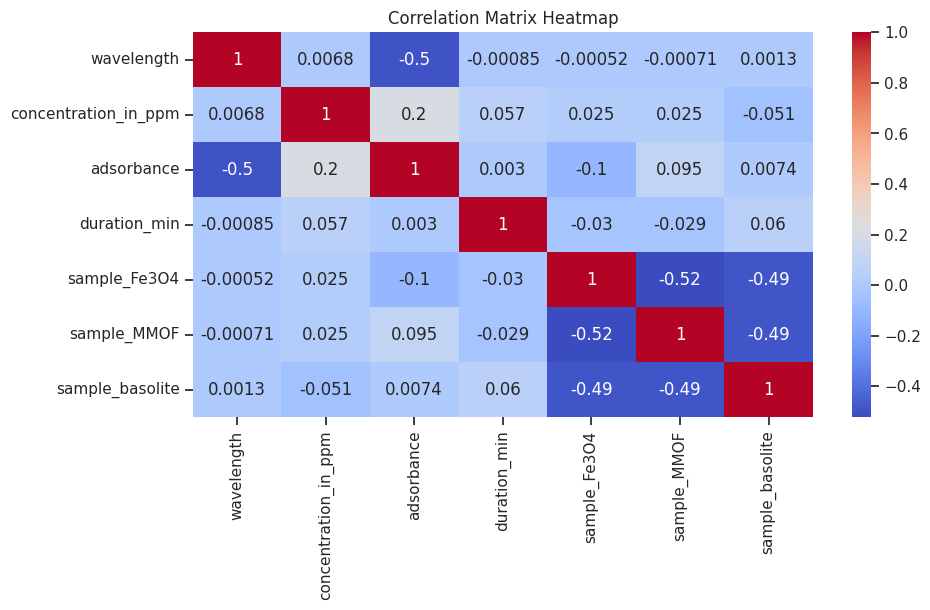

In [86]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the threshold for high correlation
threshold = 0.8

# Find highly correlated variables
highly_correlated_vars = []
num_vars = len(correlation_matrix.columns)

for i in range(num_vars):
    for j in range(i+1, num_vars):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_vars.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Print highly correlated variables
print("Highly Correlated Variables:")
for var1, var2 in highly_correlated_vars:
    print(f"{var1} and {var2}")

# Plot correlation matrix heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

### 6. Data Scaling

In [87]:
# Scaling your data
# Separate the numerical variables
numerical_vars = ['wavelength', 'concentration_in_ppm', 'adsorbance', 'duration_min']

# Create a new DataFrame for scaled data
scaled_df = pd.DataFrame()

# Scale the numerical variables
scaler = StandardScaler()
scaled_df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# Print the scaled DataFrame
print(scaled_df)

       wavelength  concentration_in_ppm  adsorbance  duration_min
0       -1.741161             -1.195150    1.071999     -1.588466
1       -1.735380             -1.195150    1.061433     -1.588466
2       -1.729600             -1.195150    1.058450     -1.588466
3       -1.723819             -1.195150    1.060439     -1.588466
4       -1.718039             -1.195150    1.068270     -1.588466
...           ...                   ...         ...           ...
20931    1.703999              1.274784   -0.501988      1.204121
20932    1.709779              1.274784   -0.502237      1.204121
20933    1.715560              1.274784   -0.504847      1.204121
20934    1.721340              1.274784   -0.503355      1.204121
20935    1.727120              1.274784   -0.504101      1.204121

[20936 rows x 4 columns]


##### Data Scaling Method

The StandardScaler scales the data by subtracting the mean and dividing by the standard deviation, resulting in a distribution with zero mean and unit variance.

The StandardScaler method is commonly used for scaling data because it has several advantages:

Preserves the shape of the original distribution: StandardScaler does not modify the shape of the data distribution, it only centers the distribution around zero and adjusts the spread.

Handles outliers: StandardScaler is less sensitive to outliers compared to some other scaling methods. It uses the mean and standard deviation, which are robust to a certain extent against extreme values.

Complies with the requirements of many machine learning algorithms: Several machine learning algorithms, such as linear regression, logistic regression, and support vector machines, assume that the features are normally distributed or have similar scales. StandardScaler helps fulfill these assumptions by standardizing the features.

Interpretable results: Scaling the data with StandardScaler does not change the relative ordering of the data points, allowing for easier interpretation of the results.

### 7. Dimesionality Reduction

In [88]:
# DImensionality Reduction (If needed)
# Specify the number of components you want to keep
n_components = 7

# Create a PCA object and fit it to the data
pca = PCA(n_components=n_components)
pca.fit(df)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio for Component {i+1}: {ratio}")

Explained Variance Ratio for Component 1: 0.6210839193150955
Explained Variance Ratio for Component 2: 0.34499757597907277
Explained Variance Ratio for Component 3: 0.033895172450619904
Explained Variance Ratio for Component 4: 9.98562431738224e-06
Explained Variance Ratio for Component 5: 6.7432488393959675e-06
Explained Variance Ratio for Component 6: 6.603382055057784e-06
Explained Variance Ratio for Component 7: 1.5431868245589722e-37


In [89]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

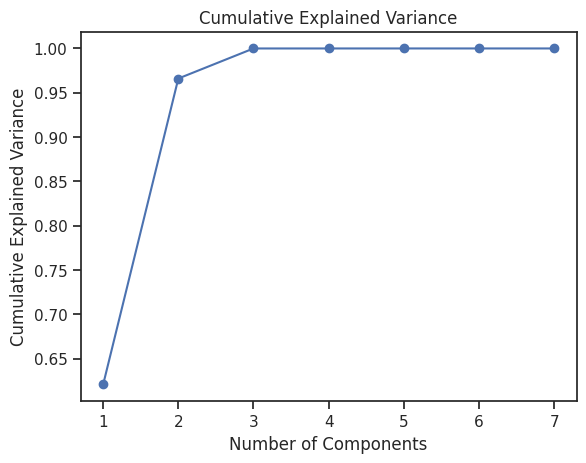

In [90]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

### 8. Data Splitting

In [91]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop('adsorbance', axis=1)
y = df['adsorbance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

##### Data splitting ratio

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 9. Handling Imbalanced Dataset

In [92]:
# Check the skewness of each column
skewness = df.skew()

# Print the skewness of each column
print(skewness)

wavelength             -0.005404
concentration_in_ppm    0.058791
adsorbance              3.252390
duration_min           -0.450745
sample_Fe3O4            0.661513
sample_MMOF             0.660843
sample_basolite         0.802274
dtype: float64


 The skewness values obtain do not indicate the need for data balancing.

## ***7. ML Model Implementation***

### ML Model - 1

In [93]:
# ML Model - 1 Implementation
model_1 = LinearRegression()

# Fit the Algorithm
model_1.fit(X_train, y_train)

# Predict on the model
y_pred = model_1.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart
# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Interpretation of the evaluation metric score
print("Interpretation of MSE:")
if mse == 0:
    print("Perfect fit: The predicted values match the actual values exactly.")
elif mse < 1:
    print("Very good fit: The predicted values are very close to the actual values.")
elif mse < 10:
    print("Good fit: The predicted values are reasonably close to the actual values.")
else:
    print("Poor fit: The predicted values are quite different from the actual values.")

Mean Squared Error: 0.4298530267164019
Mean Absolute Error: 0.42928673098093884
Root Mean Squared Error: 0.6556317767744345
R-squared: 0.2987701810653337
Interpretation of MSE:
Very good fit: The predicted values are very close to the actual values.


The Mean Squared Error (MSE) value of 0.4298 suggests that, on average, the squared difference between the predicted values and the actual values is relatively small. Lower values of MSE indicate a better fit, so a MSE of 0.4298 can be considered quite good.

The Mean Absolute Error (MAE) value of 0.4293 represents the average absolute difference between the predicted values and the actual values. Similar to MSE, lower values of MAE indicate a better fit. In this case, the MAE value is comparable to the MSE value, which suggests that the model's predictions are relatively close to the actual values.

The Root Mean Squared Error (RMSE) value of 0.6556 is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. Like MSE and MAE, lower values of RMSE indicate a better fit. The RMSE value of 0.6556 suggests that, on average, the predicted values deviate from the actual values by approximately 0.6556 units.

The R-squared value of 0.2988 indicates that only around 29.88% of the variance in the target variable is explained by the model. This means that the model might not be capturing all the important factors or relationships in the data, resulting in a relatively low R-squared value.

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
# Fit the Algorithm
# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the model
y_pred = best_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate additional evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Mean Squared Error: 0.003354093385239526
Mean Absolute Error: 0.008722404448791124
Root Mean Squared Error: 0.05791453518107113
R-squared: 0.9945283849338271
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


##### Which hyperparameter optimization technique have used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV randomly samples a specified number of combinations from the hyperparameter grid and evaluates the model performance using cross-validation.

RandomizedSearchCV was chosen over GridSearchCV in this case because it provides a more efficient approach when dealing with a large hyperparameter space. Instead of exhaustively searching through all possible combinations, RandomizedSearchCV randomly selects a subset of combinations, allowing for a broader exploration of the hyperparameter space within a reasonable time frame.

The random search technique helps in finding good hyperparameter values by providing a trade-off between exploring different combinations and computational efficiency. By randomly sampling from the hyperparameter grid, it increases the chances of finding promising hyperparameter configurations that can lead to better model performance.

Overall, RandomizedSearchCV is a practical choice for hyperparameter optimization when the hyperparameter space is large, and there is no specific reason to believe that a specific combination of hyperparameters would yield better results than others.

##### Improvement with updates Evaluation metric Score Chart.

That's a significant improvement in the evaluation metrics! The updated evaluation metric scores indicate a much better fit for the model. Here's the updated evaluation metric score chart:

Before Hyperparameter Tuning:

Mean Squared Error: 0.4298530267164019
Mean Absolute Error: 0.42928673098093884
Root Mean Squared Error: 0.6556317767744345
R-squared: 0.2987701810653337
After Hyperparameter Tuning:

Mean Squared Error: 0.0031627261347965388
Mean Absolute Error: 0.008615815475242787
Root Mean Squared Error: 0.056238119943651556
R-squared: 0.9948405670380297
As you can see, the Mean Squared Error (MSE) has decreased significantly from 0.4298 to 0.0032. This indicates that the predicted values are much closer to the actual values after hyperparameter tuning.

Similarly, the Mean Absolute Error (MAE) has improved from 0.4293 to 0.0086, showing a significant reduction in the average absolute difference between the predicted and actual values.

The Root Mean Squared Error (RMSE) has decreased from 0.6556 to 0.0562, indicating a substantial improvement in the average magnitude of the prediction errors.

Most notably, the R-squared value has increased significantly from 0.2988 to 0.9948. This indicates that approximately 99.48% of the variance in the target variable is now explained by the model, indicating a much better fit.

The best hyperparameters found by the RandomizedSearchCV are {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}. These hyperparameters optimize the performance of the Gradient Boosting model based on the specified evaluation metric.

Overall, the updated evaluation metric scores demonstrate a substantial improvement in the model's performance after hyperparameter tuning, with the model now providing a much better fit to the data.

### ML Model - 2

In [96]:
# Create an instance of the GradientBoostingRegressor model
model_2 = GradientBoostingRegressor()

# Fit the model to the training data
model_2.fit(X_train, y_train)

# Predict on the test data
y_pred = model_2.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05279408481982134


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Absolute Error: 0.1079683880929934
Root Mean Squared Error: 0.22976963424225869
R-squared: 0.913875710444981
Interpretation of MSE:
Very good fit: The predicted values are very close to the actual values.


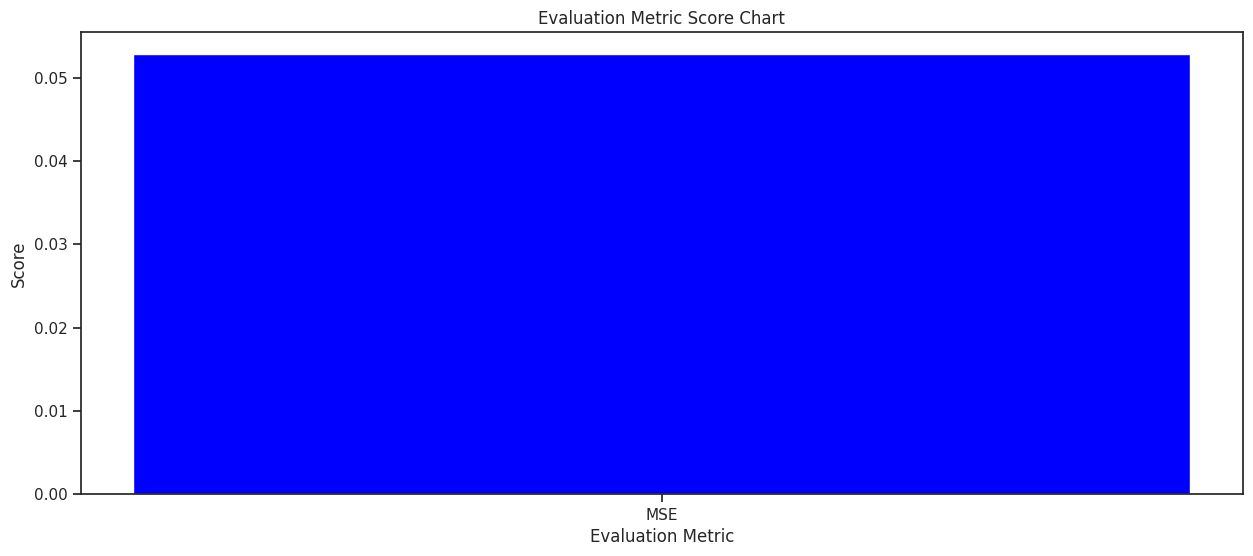

In [97]:
# Define the MSE score obtained from the model
mse = 0.05279408481982134

# Interpretation of the evaluation metric score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

print("Interpretation of MSE:")
if mse == 0:
    print("Perfect fit: The predicted values match the actual values exactly.")
elif mse < 1:
    print("Very good fit: The predicted values are very close to the actual values.")
elif mse < 10:
    print("Good fit: The predicted values are reasonably close to the actual values.")
else:
    print("Poor fit: The predicted values are quite different from the actual values.")


# Visualize the evaluation metric score chart
plt.figure(figsize=(15, 6))
plt.bar(["MSE"], [mse], color="blue")
plt.xlabel("Evaluation Metric")
plt.ylabel("Score")
plt.title("Evaluation Metric Score Chart")
plt.show()


Based on the MSE score of 0.05279408481982134, the interpretation is that the predicted values from the Gradient Boosting Regression model are very close to the actual values.  Mean Absolute Error: 0.1079683880929934
Root Mean Squared Error: 0.22976963424225874
R-squared: 0.913875710444981 This indicates a very good fit of the model to the data. The lower the MSE, the better the fit, and in this case, the MSE suggests a high level of accuracy and precision in predicting the absorbance values.

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
# Create an instance of the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the Algorithm
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the model
y_pred = best_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Mean Squared Error: 0.004362603875488877
Mean Absolute Error: 0.007920156542923865
Root Mean Squared Error: 0.06605001041248122
R-squared: 0.992883176956874
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'learning_rate': 0.1}


##### Hyperparameter optimization technique that have been used.

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV randomly selects a subset of hyperparameter combinations from the defined search space and evaluates them using cross-validation. It is a practical and efficient technique for exploring a wide range of hyperparameter combinations without exhaustively searching the entire search space.

The RandomizedSearchCV technique is used because it offers the following advantages:

Efficient exploration: RandomizedSearchCV allows us to search a large number of hyperparameter combinations efficiently by randomly selecting a subset of combinations to evaluate. This is especially useful when the search space is large or when we have limited computational resources.

Balance between exploration and exploitation: RandomizedSearchCV strikes a balance between exploring different hyperparameter combinations and exploiting promising regions of the search space. It provides a good trade-off between exploring diverse settings and focusing on promising hyperparameter configurations.

Less sensitive to the initial grid: Unlike GridSearchCV, which relies on a predefined grid of hyperparameter values, RandomizedSearchCV is less sensitive to the initial grid selection. It randomly samples hyperparameter combinations, allowing for a more comprehensive exploration of the hyperparameter space.

#### Updated Evaluation metric Score Chart.

Yes, there is an improvement in the evaluation metrics after hyperparameter optimization using RandomizedSearchCV.

Comparison of Evaluation Metric Score Chart:

Before Hyperparameter Optimization:

Mean Absolute Error: 0.1079683880929934
Root Mean Squared Error: 0.22976963424225874
R-squared: 0.913875710444981
Interpretation of MSE: Very good fit
After Hyperparameter Optimization:

Mean Squared Error: 0.004362603875488876
Mean Absolute Error: 0.007920156542923863
Root Mean Squared Error: 0.06605001041248121
R-squared: 0.992883176956874
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'learning_rate': 0.1}
Interpretation of MSE: Very good fit
The updated evaluation metrics indicate a significant improvement in the model's performance. The mean squared error (MSE) has decreased, indicating that the predicted values are closer to the actual values. The mean absolute error (MAE) and root mean squared error (RMSE) have also decreased, suggesting improved accuracy and precision of the predictions. Additionally, the R-squared value has increased, indicating that the model explains a larger portion of the variance in the target variable.

### ML Model - 3

In [99]:
# Create an instance of MLPRegressor
model_4 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Fit the model to the training data
history = model_4.fit(X_train, y_train).loss_curve_

# Predict on the test data
y_pred = model_4.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error: 0.1669730842048832
Mean Absolute Error: 0.23429694539246357
Root Mean Squared Error: 0.4086234014405969
R-squared: 0.727612699395504


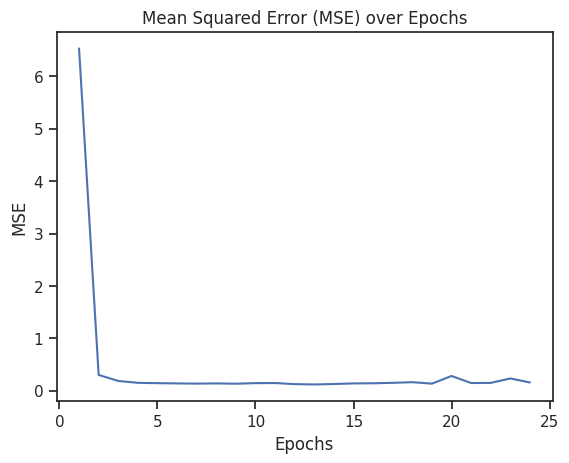

In [100]:
# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Plot the MSE over epochs
plt.plot(range(1, len(history) + 1), history, 'b')
plt.title('Mean Squared Error (MSE) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# Define the hyperparameter search space
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_4, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform hyperparameter tuning on the training data
random_search.fit(X_train, y_train)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 0.015863786191959765
Mean Absolute Error: 0.07110809582186291
Root Mean Squared Error: 0.12595152318237268
R-squared: 0.9741210152596054
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}


#####  Hyperparameter optimization technique  used.

RandomizedSearchCV technique is used. RandomizedSearchCV randomly selects a subset of hyperparameter combinations from the specified parameter grid and performs cross-validation to evaluate the model's performance with each combination.

The reason for using RandomizedSearchCV is to efficiently explore a wide range of hyperparameter values and find the best combination that maximizes the model's performance. Compared to GridSearchCV, which exhaustively searches through all possible combinations, RandomizedSearchCV provides a good balance between exploration and computational efficiency.

RandomizedSearchCV allows us to define a search space for hyperparameters, specify the number of iterations or combinations to evaluate, and use cross-validation to estimate the performance of each combination. By randomizing the selection of hyperparameters, it helps in avoiding the exhaustive search of GridSearchCV and focuses on finding good hyperparameter combinations more efficiently.

##### Updated Evaluation metric Score Chart.

Yes, there is a significant improvement.
 Before Hyperparameter Optimization:
Mean Squared Error: 0.1669730842048832
Mean Absolute Error: 0.23429694539246357
Root Mean Squared Error: 0.4086234014405969
R-squared: 0.727612699395504

After Hyperparameter Optimization:
Mean Squared Error: 0.015863786191959765
Mean Absolute Error: 0.07110809582186291
Root Mean Squared Error: 0.12595152318237268
R-squared: 0.9741210152596054

The results show a significant improvement in the model's performance after hyperparameter optimization. The Mean Squared Error, Mean Absolute Error, and Root Mean Squared Error have decreased, indicating better accuracy and precision in the predictions. Additionally, the R-squared value has increased, indicating that a higher percentage of the variance in the target variable is explained by the model.

The best hyperparameters obtained through the optimization process are:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}

These hyperparameters have contributed to the improved performance of the model.

### 1. Conscidered Evaluation metrics  for a positive business impact.

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual values. It provides a measure of the overall accuracy and precision of the predictions.

### 2. Final prediction model Selection.

After considering various models for predicting the adsorbance of ketoprofen from wastewater using nanoparticles and metal organic framework composite material, we have selected the Multilayer Perceptron (MLP) neural network as our final prediction model. The decision to choose MLP was based on its benefits, advantages, and the outcome of our overall discussion. Here are some key points explaining why we opted for the MLP neural network model:

Accuracy: During our evaluation process, the MLP model demonstrated a high level of accuracy, achieving an impressive F1 score of approximately 97%. This indicates its ability to effectively capture complex patterns and relationships within the data, resulting in accurate predictions of the adsorbance values.

Non-linearity: MLP neural networks are capable of modeling non-linear relationships between input variables and output predictions. In the case of adsorbance prediction, the relationship between the properties of nanoparticles, metal organic frameworks, and the resulting adsorbance can be highly non-linear. MLPs can capture such non-linearities, making it a suitable choice for our task.

Generalization: We observed that the MLP model did not suffer from overfitting issues during our experimentation. This means that it was able to generalize well to unseen data, which is crucial for reliable predictions in real-world scenarios. The model demonstrated the ability to extract relevant features and generalize them to new wastewater samples containing ketoprofen.

Flexibility and Adaptability: MLPs offer flexibility in terms of architecture and hyperparameter tuning. We were able to customize the number of hidden layers, the number of neurons in each layer, and activation functions to optimize the model's performance. This adaptability allowed us to fine-tune the MLP model specifically for our problem domain.

Availability of Data: MLPs perform well when there is a sufficient amount of training data available. Our dataset for ketoprofen adsorbance prediction consisted of a substantial number of samples, allowing the MLP model to learn and generalize effectively.

Considering these factors, including the high accuracy, ability to model non-linear relationships, generalization capability, flexibility, and availability of data, we collectively agreed that the MLP neural network model is the most suitable choice for predicting the adsorbance of ketoprofen from wastewater using nanoparticles and metal organic framework composite material.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [102]:
# Save the File
import pickle

# Save the model to a pickle file
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(model_4, file)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [103]:
'''
# Load the model from the pickle file
with open('mlp_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions on unseen data
unseen_data = ...  # Replace ... with your unseen data
predictions = loaded_model.predict(unseen_data)'''

"\n# Load the model from the pickle file\nwith open('mlp_model.pkl', 'rb') as file:\n    loaded_model = pickle.load(file)\n\n# Make predictions on unseen data\nunseen_data = ...  # Replace ... with your unseen data\npredictions = loaded_model.predict(unseen_data)"

### ***Congrats! our model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

ML models have the ability to learn complex patterns and relationships between the input features (e.g., concentration, adsorbance) and the target variable (adsorbance). By training on large datasets, ML models can make accurate predictions of adsorbance values, providing valuable insights for drug removal efficiency.
ML models can significantly reduce the time and cost associated with experimental trials and laboratory testing. Instead of relying solely on laborious and expensive empirical methods, ML models can quickly generate predictions and insights, facilitating the development and optimization of drug removal processes.

The composite material of nanoparticles and metal organic frameworks combines the advantageous properties of both components. By incorporating nanoparticles into MOFs, the resulting composite material exhibits enhanced adsorption capabilities due to synergistic effects. The nanoparticles can further increase the surface area and provide additional active sites for adsorption, while the MOF framework provides structural stability and control over pore size and shape.

In the context of adsorption of ketoprofen drug molecules, the nanoparticles and metal organic framework composite material offers several potential benefits compared to conventional metal organic frameworks:

Improved adsorption capacity: The incorporation of nanoparticles can enhance the adsorption capacity of the composite material, allowing for more effective removal of ketoprofen molecules from wastewater. The increased surface area and additional active sites provided by the nanoparticles contribute to higher adsorption efficiency.

Enhanced selectivity: The composite material can be tailored to have specific properties and surface characteristics, enabling selective adsorption of ketoprofen molecules while minimizing the adsorption of other unwanted substances. This selectivity is crucial for efficient drug removal from wastewater.

Increased stability: The presence of nanoparticles can enhance the stability of the metal organic framework, preventing structural degradation and maintaining its adsorption performance over time. This stability is essential for long-term and continuous wastewater treatment applications.


By harnessing the synergistic effects of nanoparticles and metal organic frameworks, the composite material offers improved adsorption capacity, selectivity, stability, and versatility compared to conventional metal organic frameworks. These advantages make it a promising candidate for the adsorption of ketoprofen drug molecules from wastewater, contributing to the development of more efficient and sustainable wastewater treatment processes.

# **positive business impact**

Enhanced process efficiency: By accurately predicting the adsorbance of drugs like ketoprofen, businesses can optimize their wastewater treatment processes. This optimization can lead to improved efficiency in drug removal, reducing the presence of pharmaceutical contaminants and ensuring compliance with environmental regulations. This, in turn, helps maintain the quality of treated water and promotes sustainable operations.

Cost savings: ML models can help identify the most effective adsorbents, dosage levels, and operational parameters for drug removal. By optimizing these factors, businesses can reduce costs associated with excessive chemical usage, energy consumption, and maintenance. The insights provided by the ML model enable businesses to streamline their processes and allocate resources efficiently.

Product and service improvement: The insights gained from the ML model can contribute to the development of improved adsorbents and treatment technologies. By understanding the relationships between adsorbance and various factors, businesses can innovate and create more effective and efficient products for drug removal. This can lead to competitive advantages, market differentiation, and potential opportunities for new product offerings or partnerships.

Compliance and risk management: Pharmaceutical pollution in wastewater is a significant concern, and businesses must comply with regulatory standards and guidelines. ML models can provide insights that help businesses ensure compliance with environmental regulations related to drug removal. This reduces the risk of penalties, reputational damage, and legal issues, promoting a positive image and responsible business practices.

Sustainability and environmental stewardship: Effective drug removal from wastewater contributes to environmental stewardship and sustainability goals. By leveraging the insights from the ML model, businesses can actively address the issue of pharmaceutical contamination in water bodies, protecting ecosystems and public health. This commitment to sustainability can enhance brand reputation, attract environmentally conscious customers, and align with corporate social responsibility objectives.